In [7]:
#First Question.

In [13]:
#Import the necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


#Function to load the Protein Interaction file. 
def load_network_from_file(file_path):
    
    G = nx.Graph()
    with open(file_path, 'r') as file:
        next(file)  # Skipping the header line since it doesn't contain any protein names.
        for line in file:
            parts = line.strip().split()
            if len(parts) == 2:
                G.add_edge(parts[0], parts[1])
    return G


# Function to calculate and clustering coefficient for each node.
def calculate_metrics(G):
    
    degrees = dict(G.degree())
    clustering_coeffs = nx.clustering(G)
    return degrees, clustering_coeffs


#Function to plot the degree of distribution.
def plot_degree_distribution(G):
    """Plot the degree distribution."""
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees, bins=range(1, max(degrees) + 1), density=True, log=True)
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution')
    plt.show()

# Reading the protein Protein Interaction file.
file_path = 'Human-PPI-2.txt'

# Loading the network from the file
network = load_network_from_file(file_path)

# Calculating degree and clustering coefficient for each node
node_degrees, node_clustering_coeffs = calculate_metrics(network)

# Print the metrics for each node
for node in network.nodes():
    print(f'Node: {node}, Degree: {node_degrees[node]}, Clustering Coefficient: {node_clustering_coeffs[node]}')

# Calculate and print the average clustering coefficient
average_clustering = nx.average_clustering(network)
print(f'Average Clustering Coefficient: {average_clustering}')

Node: 1810055G02Rik, Degree: 3, Clustering Coefficient: 0
Node: MPRIP, Degree: 15, Clustering Coefficient: 0.13333333333333333
Node: RAI14, Degree: 15, Clustering Coefficient: 0.12380952380952381
Node: TPM1, Degree: 15, Clustering Coefficient: 0.10256410256410256
Node: 2810046L04Rik, Degree: 2, Clustering Coefficient: 0
Node: ARF1, Degree: 33, Clustering Coefficient: 0.06451612903225806
Node: ARF3, Degree: 15, Clustering Coefficient: 0.09523809523809523
Node: 4922501C03Rik, Degree: 1, Clustering Coefficient: 0
Node: CPNE4, Degree: 20, Clustering Coefficient: 0
Node: 4930572J05Rik, Degree: 6, Clustering Coefficient: 0
Node: C8orf55, Degree: 2, Clustering Coefficient: 0
Node: PRKDC, Degree: 119, Clustering Coefficient: 0.0816386678455644
Node: SPRR2B, Degree: 3, Clustering Coefficient: 0
Node: SPRR2D, Degree: 5, Clustering Coefficient: 0
Node: SPRR2E, Degree: 4, Clustering Coefficient: 0
Node: SPRR2G, Degree: 4, Clustering Coefficient: 0
Node: 9830001H06Rik, Degree: 9, Clustering Coeffic

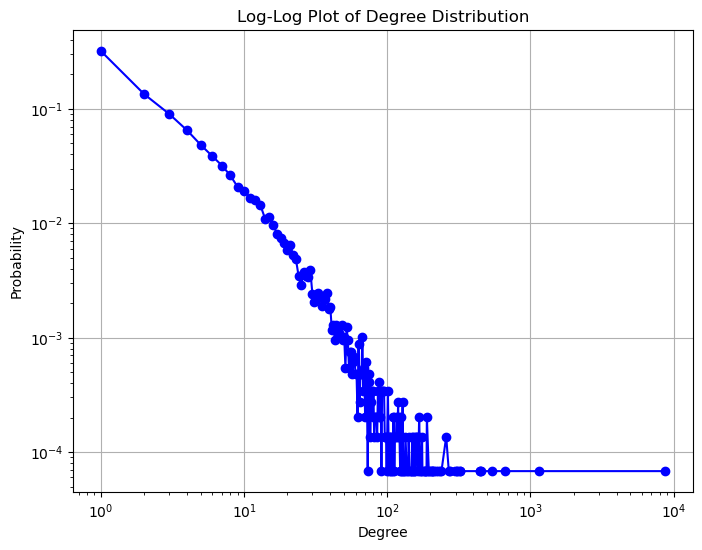

In [21]:
#Function to log-log plot of degree distribution 
def plot_degree_distribution(G):
    
    degrees = [G.degree(n) for n in G.nodes()]
    values, counts = np.unique(degrees, return_counts=True)
    
    # Normalize the counts to create a probability distribution
    probabilities = counts / counts.sum()
    
    # Creating the plot on a log-log scale
    plt.figure(figsize=(8, 6))
    plt.loglog(values, probabilities, marker='o', linestyle='-', color='b')
    plt.title('Log-Log Plot of Degree Distribution')
    plt.xlabel('Degree')
    plt.ylabel('Probability')
    plt.grid(True)
    plt.show()

# Loading the interaction file
file_path = 'Human-PPI-2.txt'
network = load_network_from_file(file_path)

#Plot the results.
plot_degree_distribution(network)


In [22]:
# Second Question.

Wilcoxon rank-sum test statistic: 259326.0, P-value: 0.4879477857940109


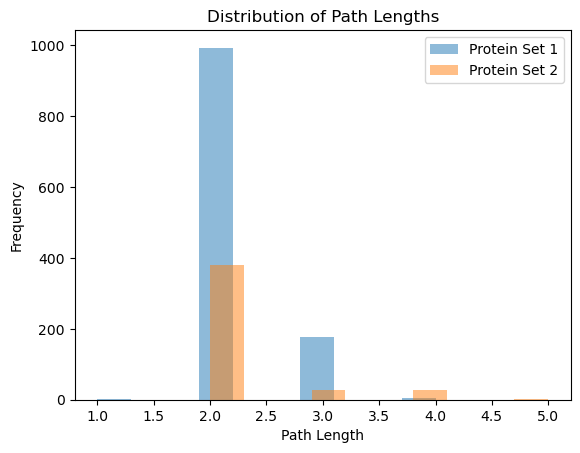

In [23]:
#Import Necessary Libraries
import networkx as nx
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt


#Function to load the protein protein interaction network fie
def load_network(file_path):
    
    G = nx.Graph()
    with open(file_path, 'r') as file:
        for line in file:
            nodes = line.strip().split()
            if len(nodes) == 2:
                G.add_edge(nodes[0], nodes[1])
    return G


#Function to load the protein list
def load_protein_list(file_path):
    
    with open(file_path, 'r') as file:
        return [line.strip() for line in file if line.strip()]

#Function to calculate the path lengths.
def calculate_path_lengths(G, protein_list):
    
    path_lengths = []
    for i in range(len(protein_list)):
        for j in range(i + 1, len(protein_list)):
            if protein_list[i] in G and protein_list[j] in G:
                try:
                    path_length = nx.shortest_path_length(G, source=protein_list[i], target=protein_list[j])
                    path_lengths.append(path_length)
                except nx.NetworkXNoPath:
                    continue  # No path between these proteins
            else:
                continue  
    return path_lengths

# Paths to the files
network_file_path = 'Human-PPI-2.txt'  
protein_list1_path = 'protein-list1-2.txt'          
protein_list2_path = 'protein-list2.txt'          

# Loading the network and proteins lists.
G = load_network(network_file_path)
protein_list1 = load_protein_list(protein_list1_path)
protein_list2 = load_protein_list(protein_list2_path)

# Calculating the path lengths for each protein set
path_lengths1 = calculate_path_lengths(G, protein_list1)
path_lengths2 = calculate_path_lengths(G, protein_list2)

#Wilcoxon rank-sum test
stat, p_value = mannwhitneyu(path_lengths1, path_lengths2, alternative='two-sided')
print(f"Wilcoxon rank-sum test statistic: {stat}, P-value: {p_value}")

# Plotting the distributions
plt.hist(path_lengths1, alpha=0.5, label='Protein Set 1')
plt.hist(path_lengths2, alpha=0.5, label='Protein Set 2')
plt.legend()
plt.xlabel('Path Length')
plt.ylabel('Frequency')
plt.title('Distribution of Path Lengths')
plt.show()
